In [35]:
import iris
import matplotlib.pyplot as plt
import seaborn
import numpy

%matplotlib inline

In [14]:
tas_noAA_file = '/g/data/r87/dbi599/drstree/CMIP5/GCM/CSIRO-QCCCE/CSIRO-Mk3-6-0/historicalMisc/mon/atmos/tas/r1i1p3/tas-global-mean_Amon_CSIRO-Mk3-6-0_historicalMisc_r1i1p3_185001-201212.nc'
sos_noAA_file = '/g/data/r87/dbi599/drstree/CMIP5/GCM/CSIRO-QCCCE/CSIRO-Mk3-6-0/historicalMisc/mon/ocean/sos/r1i1p3/sos-global-amp_Omon_CSIRO-Mk3-6-0_historicalMisc_r1i1p3_185001-201212.nc'

tas_AA_file = '/g/data/r87/dbi599/drstree/CMIP5/GCM/CSIRO-QCCCE/CSIRO-Mk3-6-0/historicalMisc/mon/atmos/tas/r1i1p4/tas-global-mean_Amon_CSIRO-Mk3-6-0_historicalMisc_r1i1p4_185001-201212.nc'
sos_AA_file = '/g/data/r87/dbi599/drstree/CMIP5/GCM/CSIRO-QCCCE/CSIRO-Mk3-6-0/historicalMisc/mon/ocean/sos/r1i1p4/sos-global-amp_Omon_CSIRO-Mk3-6-0_historicalMisc_r1i1p4_185001-201212.nc'

In [15]:
tas_noAA_cube = iris.load_cube(tas_noAA_file, 'air_temperature')
sos_noAA_cube = iris.load_cube(sos_noAA_file, 'sea_surface_salinity')

tas_AA_cube = iris.load_cube(tas_AA_file, 'air_temperature')
sos_AA_cube = iris.load_cube(sos_AA_file, 'sea_surface_salinity')

polyfit returns [a, b] corresponding to y = a + bx

In [40]:
a_noAA, b_noAA = numpy.polynomial.polynomial.polyfit(tas_noAA_cube.data, sos_noAA_cube.data, 1)
x_noAA = numpy.arange(tas_noAA_cube.data.min(), tas_noAA_cube.data.max(), 0.01)
trend_noAA = a_noAA + b_noAA * x_noAA
print 'noAA trend:', b_noAA

a_AA, b_AA = numpy.polynomial.polynomial.polyfit(tas_AA_cube.data, sos_AA_cube.data, 1)
x_AA = numpy.arange(tas_AA_cube.data.min(), tas_AA_cube.data.max(), 0.01)
trend_AA = a_AA + b_AA * x_AA
print 'AA trend:', b_AA

noAA trend: 0.119348969063
AA trend: 0.147252020362


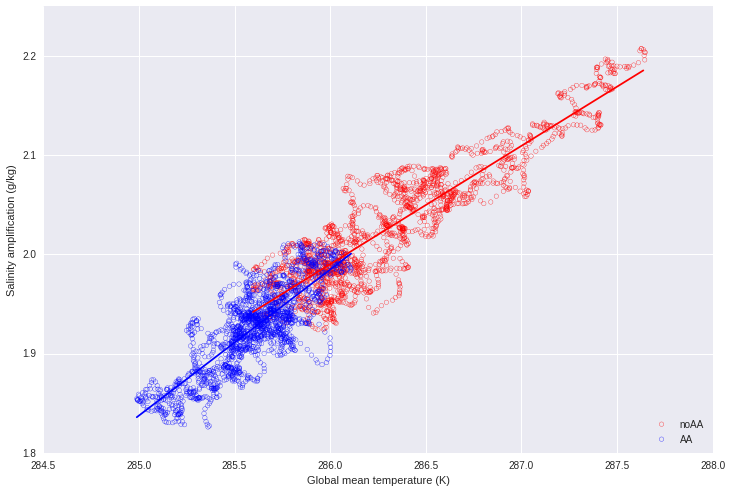

In [45]:
fig = plt.figure(figsize=(12,8))

plt.scatter(tas_noAA_cube.data, sos_noAA_cube.data, facecolors='none', edgecolors='r', label='noAA')
plt.plot(x_noAA, trend_noAA, 'r-')

plt.scatter(tas_AA_cube.data, sos_AA_cube.data, facecolors='none', edgecolors='b', label='AA')
plt.plot(x_AA, trend_AA, 'b-')

plt.legend(loc=4)
plt.ylabel('Salinity amplification (g/kg)')
plt.xlabel('Global mean temperature (K)')